<a href="https://colab.research.google.com/github/SushantTha7/Knowledge_graph_from_Text_scraped_article/blob/main/Knowledge_graph_from_Text_scraped_article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install beautifulsoup4
!pip install lxml
!pip install spacy
!pip install matplotlib
!pip install networkx

ERROR: Could not find a version that satisfies the requirement spacy== (from versions: 0.31, 0.32, 0.33, 0.40, 0.51, 0.52, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.67, 0.68, 0.70, 0.80, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.97, 0.98, 0.99, 0.100.0, 0.100.1, 0.100.2, 0.100.3, 0.100.4, 0.100.5, 0.100.6, 0.100.7, 0.101.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.3.0, 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1, 1.7.2, 1.7.3, 1.7.5, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.10.0, 1.10.1, 2.0.0, 2.0.1.dev0, 2.0.1, 2.0.2.dev0, 2.0.2, 2.0.3.dev0, 2.0.3, 2.0.4.dev0, 2.0.4, 2.0.5.dev0, 2.0.5, 2.0.6.dev0, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.0.10.dev0, 2.0.10, 2.0.11.dev0, 2.0.11, 2.0.12.dev0, 2.0.12.dev1, 2.0.12, 2.0.13.dev0, 2.0.13.dev1, 2.0.13.dev2, 2.0.13.dev4, 2.0.13, 2.0.14.dev0, 2.0.14.dev1, 2.0.15, 2.0.16.dev0, 2.0.16, 2.0.17.dev0, 2.0.17.dev1, 2.0.17, 2.0.18.dev0, 2.0.18.dev1, 2.0.18, 2.1.0, 2.1.1.dev0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1

In [ ]:
#download the langauge model
!python -m spacy download en_core_web_sm

In [ ]:
#import the required libraries
# from IPython.lib.display import TextDisplayObject as txt
from bs4 import BeautifulSoup
import requests
import spacy
import networkx as nx
import matplotlib.pyplot as plt

url = "https://thehimalayantimes.com/world/dengue-outbreak-in-bangladesh-sparks-alarm-after-364-people-die-this-year-and-infections-rise"

response = requests.get(url)
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "lxml")
#find title of article
title_of_article = soup.find("h1", {"class": "alith_post_title"}).text
# Find the article content element and extract its text
article_content = soup.find("div", {'class': "post-content"}).text
#test1
print(title_of_article)
# print(article_content)
# Clean up the extracted text
clean_text = " ".join(article_content.split())
# Print or save the text
print(clean_text)




            Dengue outbreak in Bangladesh sparks alarm after 364 people die this year and infections rise
        
DHAKA, AUGUST 11Bangladesh is struggling to deal with higher casualties and infections from dengue this year, with officials warning that the death toll this month could break records. Related Articles Dengue takes four lives in Sudurpaschim Hun Sen set to win by landslide in Cambodian elections with opposition suppressed and critics purged The government's Directorate General of Health Services reports the 2023 death toll from the mosquito-born illness has reached 364 in the south Asian country. More than 78,000 people have been infected since January this year, it said.Officials warn that the number of deaths and infections this month could set a new, grim record. In the first 10 days of August, more than 23,000 people were diagnosed with dengue, compared to 43,854 cases during all of July. More than 100 people have died so far this month, over a third as many deaths fr

In [ ]:
#PROCESSING THE TEXT OF THE ARTICLE
nlp = spacy.load('en_core_web_sm')
gp = nx.DiGraph()
doc = nlp(clean_text)
#making list of each sentences
sentences = list(doc.sents)
#iterating through each sentences
for sentence in sentences:
    sub = None
    obj = None
    relationship = None

    #iterating through tokens and identify subjects, objects and relationship using modifiers
    for token in sentence:
        if "subj" in token.dep_:
            sub = token.text
        elif "obj" in token.dep_:
            obj = token.text
        elif token.dep_ in ("attr", "acomp"):
            relationship = token.text

        if sub and obj and relationship:
            # print('test')
            #Preparing nodes and egdes for the Graph
            gp.add_node(sub)
            gp.add_node(obj)
            gp.add_edge(sub, obj, relationship = relationship)

    # using entity modifier
    if not sub or not obj:
        for token in sentence:
            if token.ent_type_ == "PERSON":
                # print('textr')
                if not sub:
                    sub = token.text
                elif not obj:
                    obj = token.text
        if sub and obj and relationship:
            # print('test')
            #Preparing nodes and egdes for the Graph
            gp.add_node(sub)
            gp.add_node(obj)
            gp.add_edge(sub, obj, relationship = relationship)

#test2
# print('test')

test


In [ ]:
#SAVING THE GRAPH IN .gml and .graphml format
nx.write_gml(gp, "graph.gml")
nx.write_graphml(gp, "graph.graphml")

print("Graph data saved as GML and GraphML files.")

Graph data saved as GML and GraphML files.


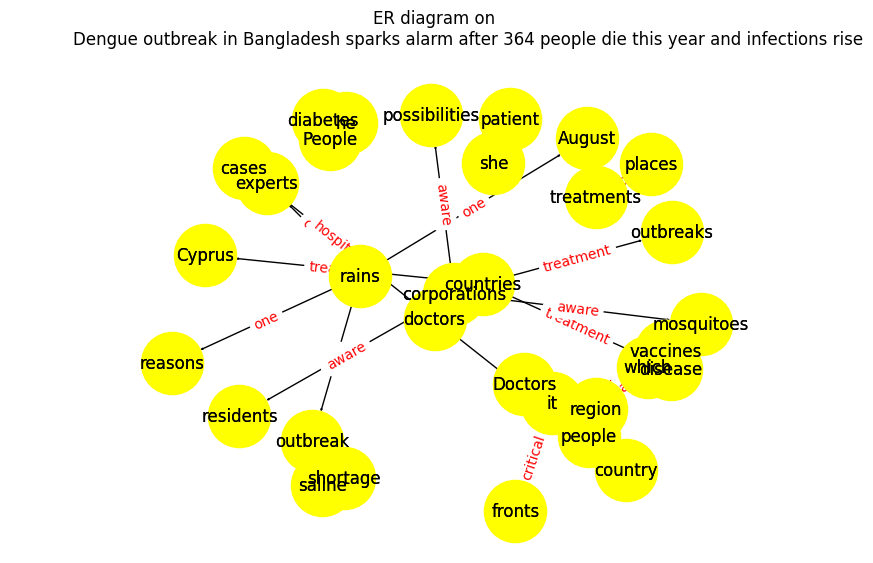

In [ ]:
#PLOTTING THE GRAPH
pos = nx.spring_layout(gp)
node_labels = {node:node for node in gp.nodes()}
edge_labels = {(u,v): data['relationship'] for u,v , data in gp.edges(data = True)}

nx.draw(gp, pos,with_labels = True, node_size = 2000, font_color='black', node_color='yellow', edge_color='black', arrowsize=2)
nx.draw_networkx_labels(gp, pos, labels=node_labels)
nx.draw_networkx_edge_labels(gp, pos, edge_labels=edge_labels, font_color='red')


# Display the graph
plt.title(f"ER diagram on {title_of_article}")
plt.show()